In [ ]:
!nvidia-smi

Wed Jun  4 09:06:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install the Ultralytics Package

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# Import All the Requried Libraries

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

#  Download Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Vb1oENoZt7ssmJxzBeA7")
project = rf.workspace("truong-jbsna").project("nhan_dien_benh_tren_la_ca_phe")
version = project.version(2)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to nhan_dien_benh_tren_la_ca_phe-2 in yolov5pytorch:: 100%|██████████| 6960/6960 [00:01<00:00, 5801.48it/s]


In [ ]:
dataset.location

'/content/nhan_dien_benh_tren_la_ca_phe-2'

In [ ]:
with open('/content/nhan_dien_benh_tren_la_ca_phe-2/data.yaml', 'w') as f:
    f.write('''\
names:
- dom rong
- nam ri sat
- phan trang
- sau ve bua
nc: 4
train: /content/nhan_dien_benh_tren_la_ca_phe-2/train/images
val: /content/nhan_dien_benh_tren_la_ca_phe-2/valid/images
test: /content/nhan_dien_benh_tren_la_ca_phe-2/test/images
''')


# Train YOLO11 Model on a Custom Dataset

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 306MB/s]
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/nhan_dien_benh_tren_la_ca_phe-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

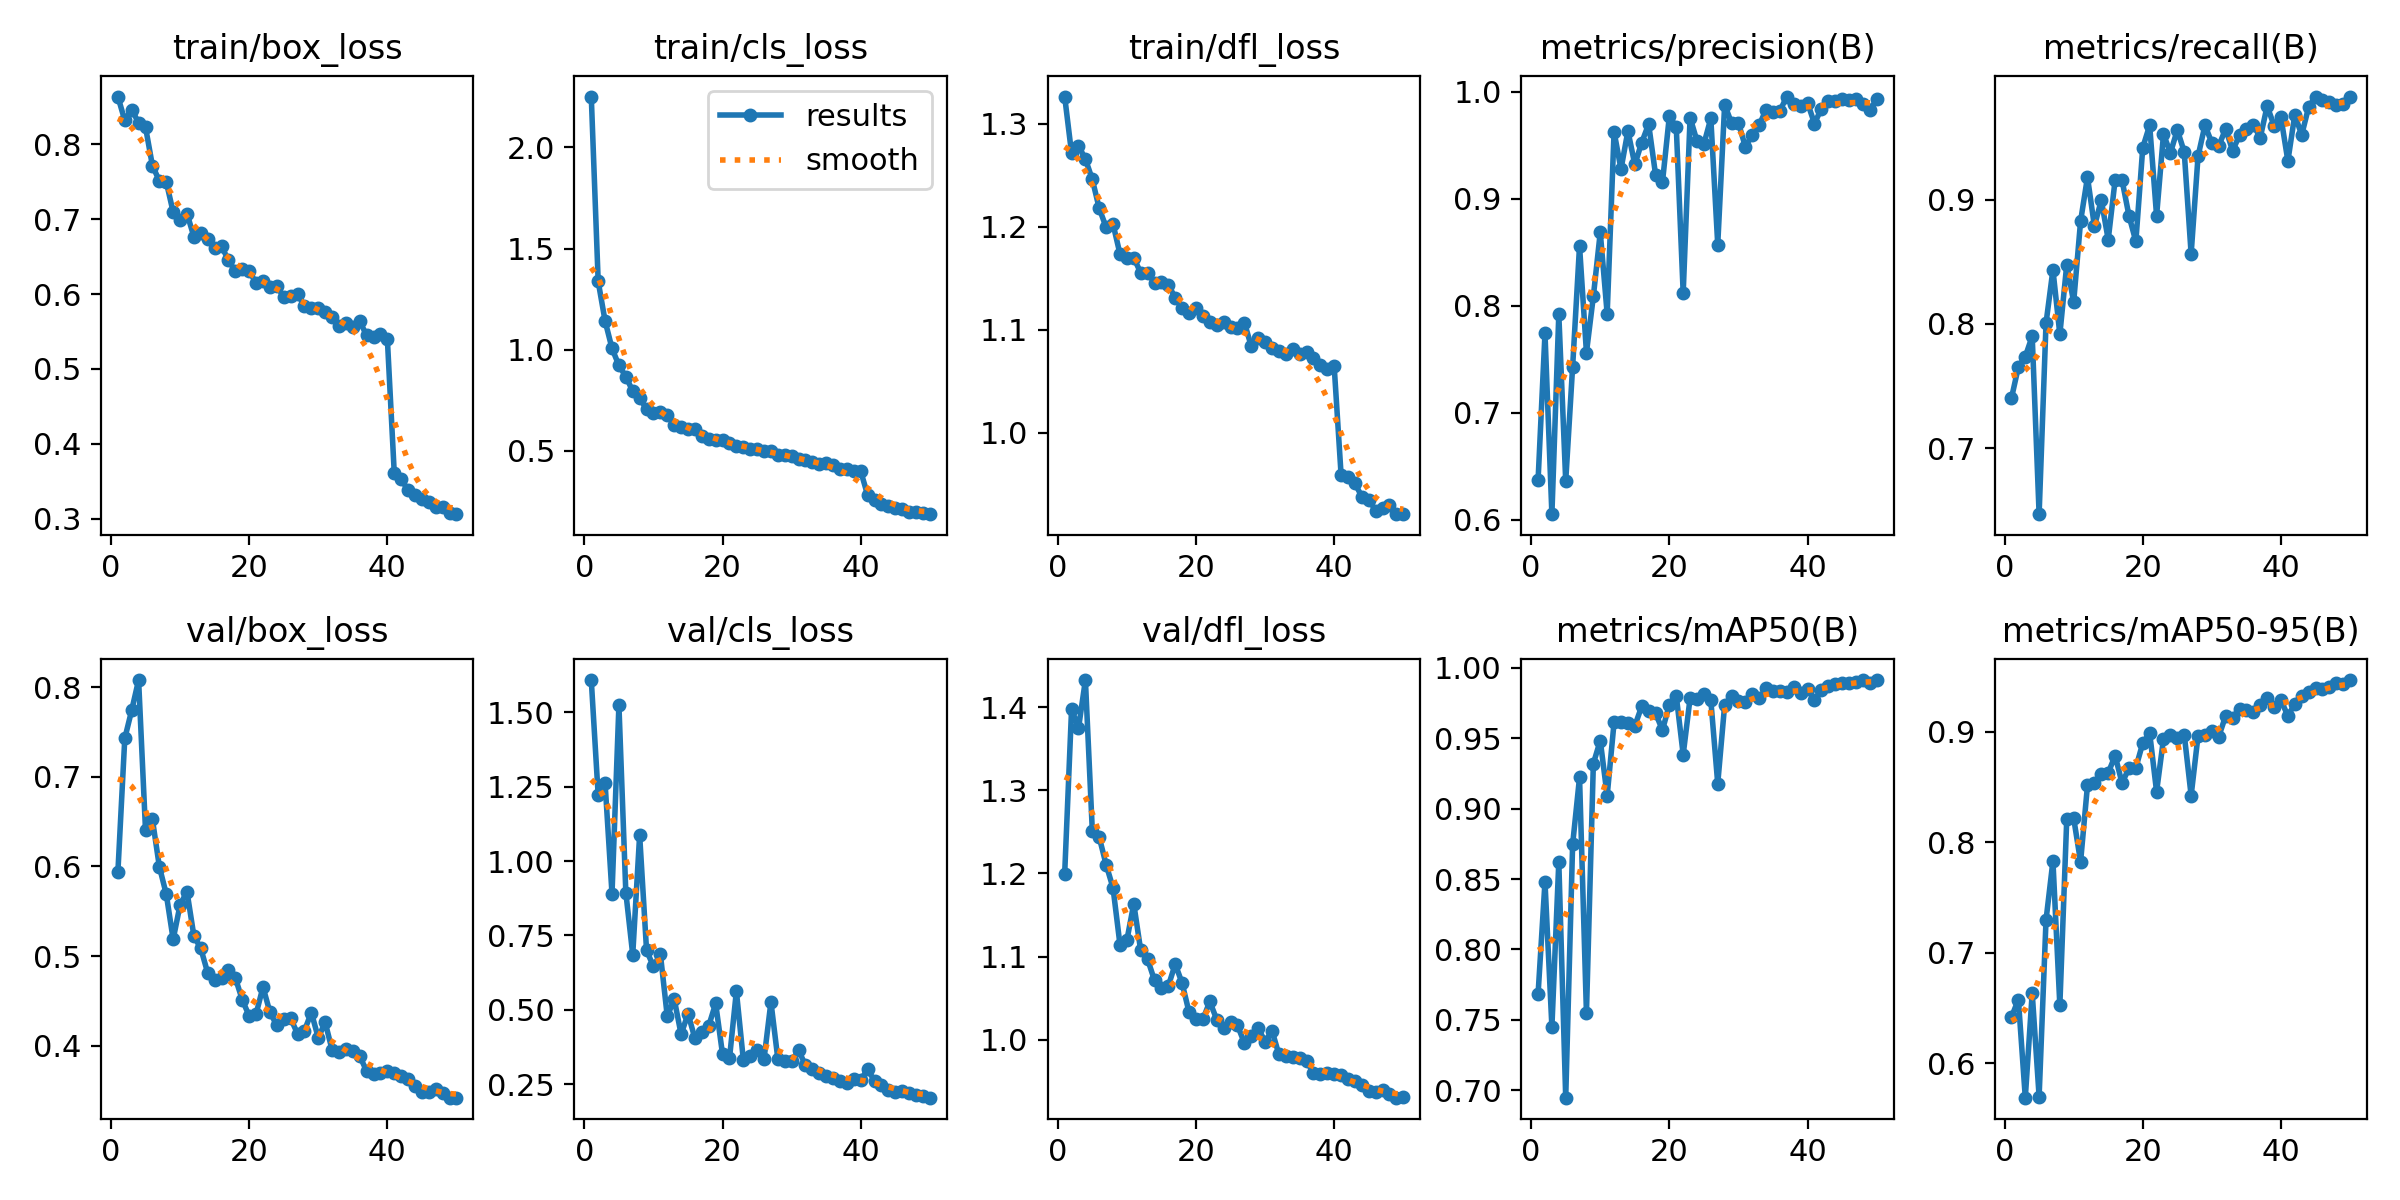

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2237_JPG.rf.64b83a733838c5aa2e40e12dc1878add.jpg: 640x640 1 sau ve bua, 13.6ms
image 2/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2249_JPG.rf.4c0da04ee5236c506bbab7b45e0365c6.jpg: 640x640 1 sau ve bua, 12.0ms
image 3/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2269_JPG.rf.f2c7635be27843628ad60acb9f8dc1ef.jpg: 640x640 1 sau ve bua, 8.4ms
image 4/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2271_JPG.rf.63d1c8eb70e55938add17d1acf4f8eea.jpg: 640x640 1 dom rong, 8.2ms
image 5/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2273_JPG.rf.9a856bba1d8a0482eb8e178368dee258.jpg: 640x640 1 dom rong, 8.0ms
image 6/150 /content/nhan_dien_benh_tren_la_ca_phe-2/test/images/IMG_2290_2_JPG.rf.fa13686da34cb2322

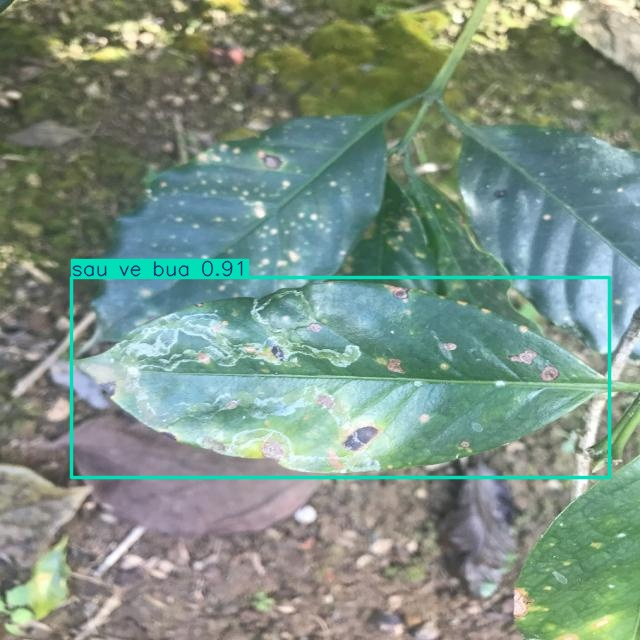

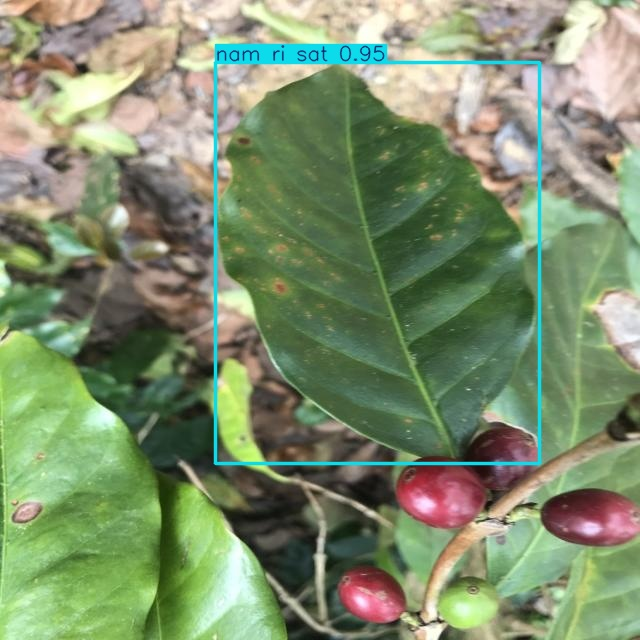

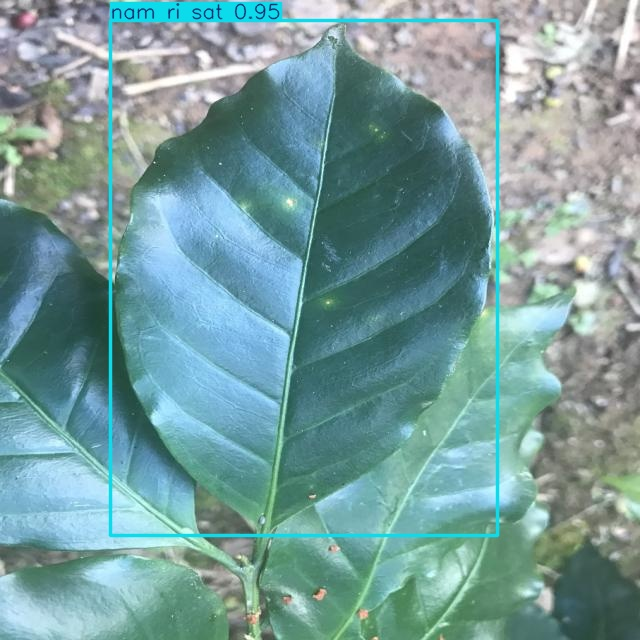

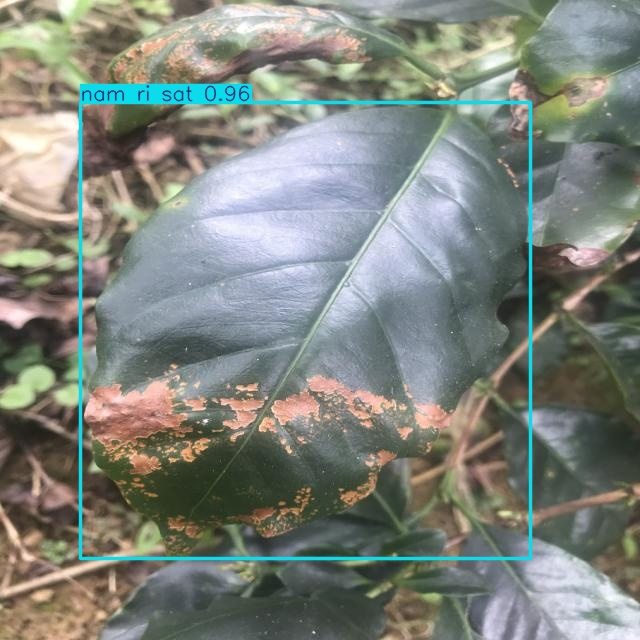

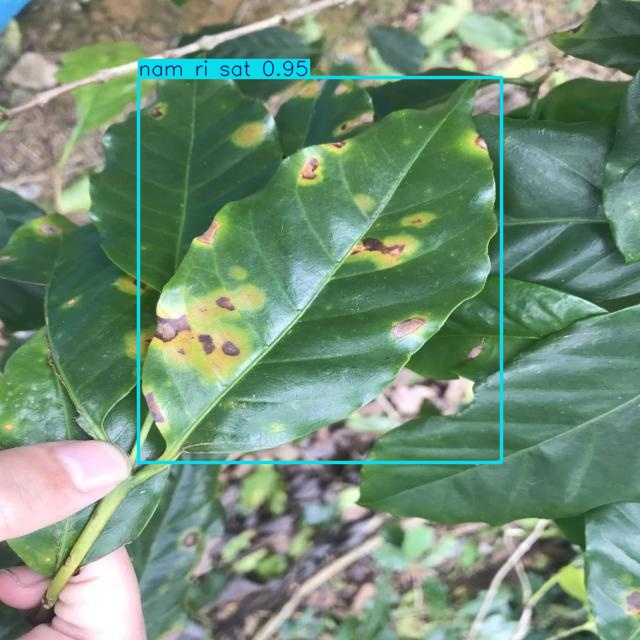

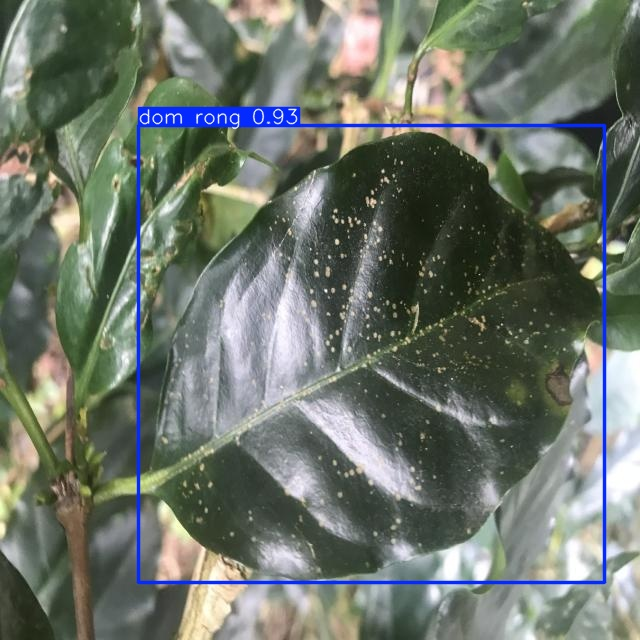

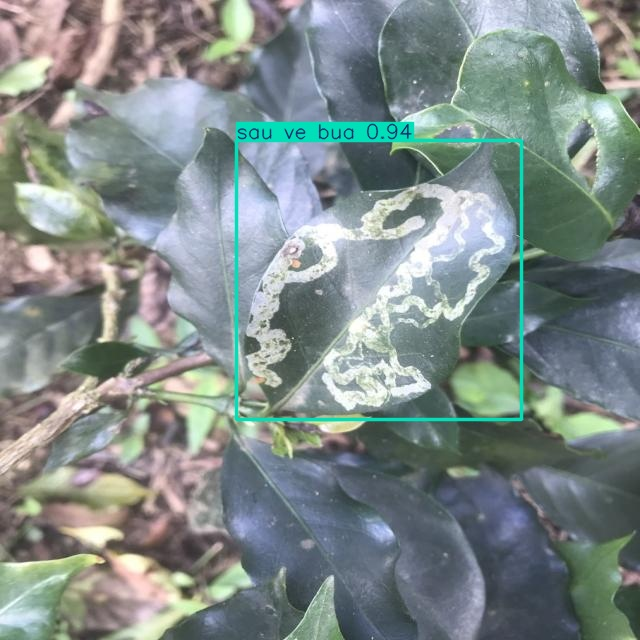

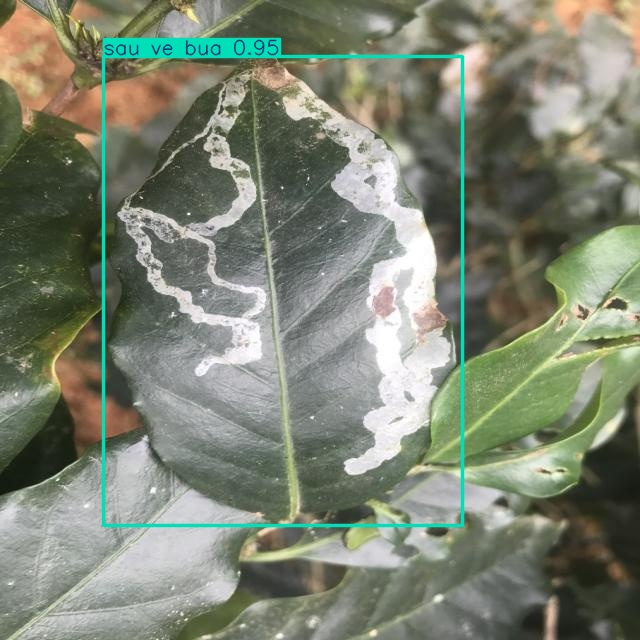

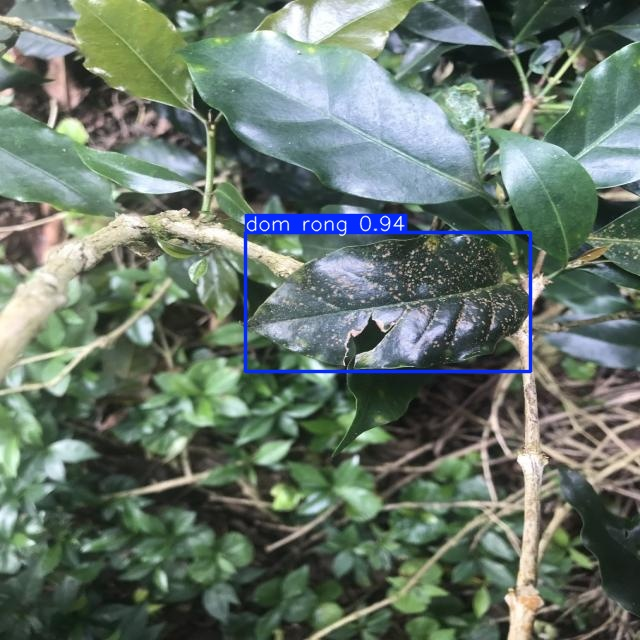

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
# from ultralytics import YOLO
# import cv2
# import yaml
# import os

# def detect_leaf_disease(image_path,
#                         model_path='/content/runs/detect/train/weights/best.pt',
#                         yaml_path='/content/nhan_dien_benh_tren_la_ca_phe-2/data.yaml'):
#     """
#     Nhận diện bệnh lá cà phê từ một ảnh đầu vào sử dụng mô hình YOLO đã huấn luyện.

#     Params:
#         image_path (str): Đường dẫn ảnh cần nhận diện.
#         model_path (str): Đường dẫn model YOLO (.pt).
#         yaml_path (str): Đường dẫn file YAML chứa class names.

#     Returns:
#         result_image (np.ndarray): Ảnh đã được vẽ kết quả.
#     """
#     # Load class names từ YAML
#     with open(yaml_path, 'r') as f:
#         data = yaml.safe_load(f)
#     class_names = data['names']

#     # Load model
#     model = YOLO(model_path)

#     # Đọc ảnh và chuyển sang RGB
#     image = cv2.imread(image_path)
#     if image is None:
#         raise ValueError(f"Không thể đọc ảnh từ đường dẫn: {image_path}")
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Inference
#     results = model(image_rgb)[0]

#     # Vẽ kết quả lên ảnh gốc
#     for box in results.boxes:
#         x1, y1, x2, y2 = map(int, box.xyxy[0])
#         conf = float(box.conf[0])
#         cls = int(box.cls[0])
#         label = f"{class_names[cls]}: {conf:.2f}"

#         # Vẽ box và nhãn
#         cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         cv2.putText(image, label, (x1, max(20, y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX,
#                     0.6, (0, 255, 0), 2)

#     return image  # Trả về ảnh kết quả (BGR)

In [ ]:
from ultralytics import YOLO
import cv2
import yaml
import os

def detect_leaf_disease(image_path,
                        model_path='/content/runs/detect/train/weights/best.pt',
                        yaml_path='/content/nhan_dien_benh_tren_la_ca_phe-2/data.yaml'):
    """
    Nhận diện bệnh lá cà phê từ một ảnh đầu vào sử dụng mô hình YOLO đã huấn luyện.

    Params:
        image_path (str): Đường dẫn ảnh cần nhận diện.
        model_path (str): Đường dẫn model YOLO (.pt).
        yaml_path (str): Đường dẫn file YAML chứa class names.

    Returns:
        result_image (np.ndarray): Ảnh đã được vẽ kết quả.
    """
    # Load class names từ YAML
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    # Gán màu cho từng class
    color_map = {
        'dom rong': (0, 0, 255),       # đỏ
        'nam ri sat': (0, 255, 0),     # xanh lá
        'phan trang': (255, 255, 0),   # vàng
        'sau ve bua': (255, 0, 0),     # xanh dương
    }

    # Load model YOLO
    model = YOLO(model_path)

    # Đọc ảnh và chuyển sang RGB
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Không thể đọc ảnh từ đường dẫn: {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Inference
    results = model(image_rgb)[0]

    # Vẽ kết quả lên ảnh gốc
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        class_name = class_names[cls]
        label = f"{class_name}: {conf:.2f}"

        # Chọn màu theo class
        color = color_map.get(class_name, (255, 255, 255))  # màu mặc định: trắng

        # Vẽ bounding box và nhãn
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, max(20, y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, color, 2)

    return image  # Trả về ảnh kết quả (BGR)



0: 640x640 1 nam ri sat, 1 sau ve bua, 18.9ms
Speed: 8.2ms preprocess, 18.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


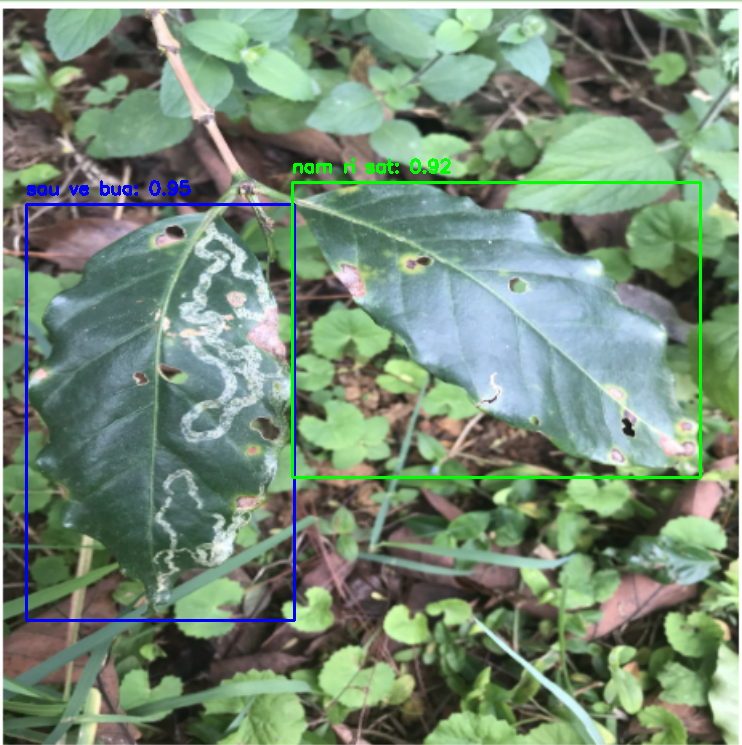

True

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files

# Đặt tên ảnh bạn vừa upload, ví dụ: 'test_leaf.jpg'
image_path = '/content/494818905_1058964555706947_8075777028082396912_n.png'

# Gọi hàm detect
result_image = detect_leaf_disease(image_path)

# Hiển thị kết quả
cv2_imshow(result_image)

# Lưu kết quả
cv2.imwrite('/content/detected_leaf.jpg', result_image)